# Tennis analysis from 2011 to 2019

The data from [Kaggle](https://www.kaggle.com/datasets/hwaitt/tennis-20112019). The data set contains results, stats and odds for most of tennis matches from 2011 till 2019. We can use this data set to answes some intersting questions:
1. Who won most in each surface form 2011 to 2019?
2. Are the results most likely end by 2-0? 
3. Did the players who has better performance of 1st serves would probably won the game? 

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

df_wta = pd.read_csv('wta.csv')
df_wta.head()

,Unnamed: 0,ID,RID_CUR,GameD,TName,Name_1,IsHome_CUR_1,Result_CUR_1,IsBirthDay_CUR_1,IsLastRet_CUR_1,...,TourChanged_CUR_2,TourDist_CUR_1,TourDist_CUR_2,SurfaceChanged_CUR_1,SurfaceChanged_CUR_2,DaysFromLast_CUR_1,DaysFromLast_CUR_2,Month,WeekDay,Year
0,0,131908.0,1,2011-01-01,ASB Classic - Auckland,Anna-Lena Groenefeld,0.0,6-4 6-4,0.0,0.0,...,1,18311.535190,17955.303860,1,1,76.0,83.0,1,5,2011
1,1,131915.0,1,2011-01-01,ASB Classic - Auckland,Anne Kremer,0.0,5-7 2-6,0.0,0.0,...,1,18311.535190,14195.618370,1,0,75.0,127.0,1,5,2011
2,2,131911.0,1,2011-01-01,ASB Classic - Auckland,Corinna Dentoni,0.0,6-2 6-4,0.0,0.0,...,1,8870.286712,NaN,0,1,81.0,NaN,1,5,2011
3,3,131906.0,1,2011-01-01,ASB Classic - Auckland,Elena Bovina,0.0,6-4 6-0,0.0,0.0,...,1,16182.811630,8870.286712,1,0,77.0,79.0,1,5,2011
4,4,131916.0,1,2011-01-01,ASB Classic - Auckland,Emily Fanning,1.0,2-6 2-6,0.0,0.0,...,1,NaN,13731.914240,1,0,NaN,103.0,1,5,2011


In [216]:
subdf = df[['Surface','TourCountry','RID_CUR','Year',
            'Name_1','IsHome_CUR_1','Age_CUR_1','Serve1stWon_1','Serve2ndWon_1','Aces_1','DoubleFaults_1',
            'Result_CUR_1','SETS_0-2_1', 'SETS_1-2_1','SETS_2-0_1','SETS_2-1_1',
            'Name_2','IsHome_CUR_2','Age_CUR_2','Serve1stWon_2','Serve2ndWon_2','Aces_2','DoubleFaults_2']]
subdf.describe()

,Surface,RID_CUR,Year,IsHome_CUR_1,Age_CUR_1,Serve1stWon_1,Serve2ndWon_1,Aces_1,DoubleFaults_1,SETS_0-2_1,SETS_1-2_1,SETS_2-0_1,SETS_2-1_1,IsHome_CUR_2,Age_CUR_2,Serve1stWon_2,Serve2ndWon_2,Aces_2,DoubleFaults_2
count,134810.000000,134810.000000,134810.000000,134810.000000,133402.000000,109115.000000,109112.000000,93714.000000,108462.000000,131398.000000,131398.000000,131398.000000,131398.000000,134810.000000,133378.000000,109143.00000,109142.000000,93707.000000,108497.000000
mean,1.830762,4.486737,2016.930339,0.261086,22.615643,25.581827,11.073200,2.008227,3.835094,0.345690,0.135169,0.375569,0.143571,0.261398,22.621067,25.58493,11.063569,2.026839,3.836936
std,0.981986,2.801015,2.160879,0.439228,4.224512,9.899911,5.198656,2.257019,2.854690,0.475595,0.341906,0.484271,0.350656,0.439398,4.234844,9.92724,5.202225,2.279724,2.860408
min,1.000000,1.000000,2011.000000,0.000000,13.498630,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.284932,0.00000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,2016.000000,0.000000,19.309589,19.000000,7.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.323288,19.00000,7.000000,0.000000,2.000000
50%,2.000000,4.000000,2018.000000,0.000000,22.101370,25.000000,10.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.101370,25.00000,11.000000,1.000000,3.000000
75%,2.000000,5.000000,2019.000000,1.000000,25.320548,32.000000,14.000000,3.000000,5.000000,1.000000,0.000000,1.000000,0.000000,1.000000,25.326027,32.00000,14.000000,3.000000,5.000000
max,5.000000,16.000000,2020.000000,1.000000,71.178082,75.000000,41.000000,24.000000,32.000000,1.000000,1.000000,1.000000,1.000000,1.000000,71.257534,80.00000,42.000000,31.000000,42.000000


In [160]:
subdf.head()

,Surface,TourCountry,RID_CUR,Year,Name_1,IsHome_CUR_1,Age_CUR_1,Serve1stWon_1,Serve2ndWon_1,Aces_1,...,SETS_1-2_1,SETS_2-0_1,SETS_2-1_1,Name_2,IsHome_CUR_2,Age_CUR_2,Serve1stWon_2,Serve2ndWon_2,Aces_2,DoubleFaults_2
0,1.0,NZL,1,2011,Anna-Lena Groenefeld,0.0,25.594521,21.0,6.0,0.0,...,0.0,0.0,0.0,Vladimira Uhlirova,0.0,32.684932,13.0,10.0,1.0,4.0
1,1.0,NZL,1,2011,Anne Kremer,0.0,35.232877,24.0,3.0,4.0,...,0.0,0.0,0.0,Silvia Soler-Espinosa,0.0,23.134247,37.0,16.0,1.0,7.0
2,1.0,NZL,1,2011,Corinna Dentoni,0.0,21.438356,26.0,10.0,3.0,...,0.0,0.0,0.0,Leela Beattie,1.0,16.904110,NaN,NaN,NaN,NaN
3,1.0,NZL,1,2011,Elena Bovina,0.0,27.832877,45.0,18.0,1.0,...,1.0,0.0,0.0,Aiko Nakamura,0.0,27.030137,9.0,2.0,1.0,6.0
4,1.0,NZL,1,2011,Emily Fanning,1.0,15.564384,NaN,NaN,NaN,...,NaN,NaN,NaN,Katie O'Brien,0.0,24.684932,16.0,7.0,2.0,8.0


## Question 1

In [217]:
subdf['player1_won']=subdf['SETS_2-0_1']+subdf['SETS_2-1_1']

/Users/ruonan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [218]:
best_players_in_surface1 = subdf[subdf['Surface'].values==1].groupby(['Name_1']).agg(total =('player1_won','sum')).sort_values(by='total', ascending = False)
best_players_in_surface2 = subdf[subdf['Surface'].values==2].groupby(['Name_1']).agg(total =('player1_won','sum')).sort_values(by='total', ascending = False)
best_players_in_surface3 = subdf[subdf['Surface'].values==3].groupby(['Name_1']).agg(total =('player1_won','sum')).sort_values(by='total', ascending = False)
best_players_in_surface4 = subdf[subdf['Surface'].values==4].groupby(['Name_1']).agg(total =('player1_won','sum')).sort_values(by='total', ascending = False)
best_players_in_surface5 = subdf[subdf['Surface'].values==5].groupby(['Name_1']).agg(total =('player1_won','sum')).sort_values(by='total', ascending = False)

In [219]:
"The best player for the surfac 1 is {} who won {}matches from 2011 to 2019.".format(best_players_in_surface1.index[0],best_players_in_surface1.values[0])

'The best player for the surfac 1 is Caroline Wozniacki who won [129.]matches from 2011 to 2019.'

In [220]:
"The best player for the surfac 2 is {} who won {}matches from 2011 to 2019.".format(best_players_in_surface2.index[0],best_players_in_surface2.values[0])

'The best player for the surfac 2 is Fernanda Brito who won [91.]matches from 2011 to 2019.'

In [221]:
"The best player for the surfac 3 is {} who won {}matches from 2011 to 2019.".format(best_players_in_surface3.index[0],best_players_in_surface3.values[0])

'The best player for the surfac 3 is Vitalia Diatchenko who won [33.]matches from 2011 to 2019.'

In [222]:
"The best player for the surfac 4 is {} who won {}matches from 2011 to 2019.".format(best_players_in_surface4.index[0],best_players_in_surface4.values[0])

'The best player for the surfac 4 is Ayano Shimizu who won [22.]matches from 2011 to 2019.'

In [223]:
"The best player for the surfac 5 is {} who won {}matches from 2011 to 2019.".format(best_players_in_surface5.index[0],best_players_in_surface5.values[0])

'The best player for the surfac 5 is Alison Riske who won [43.]matches from 2011 to 2019.'

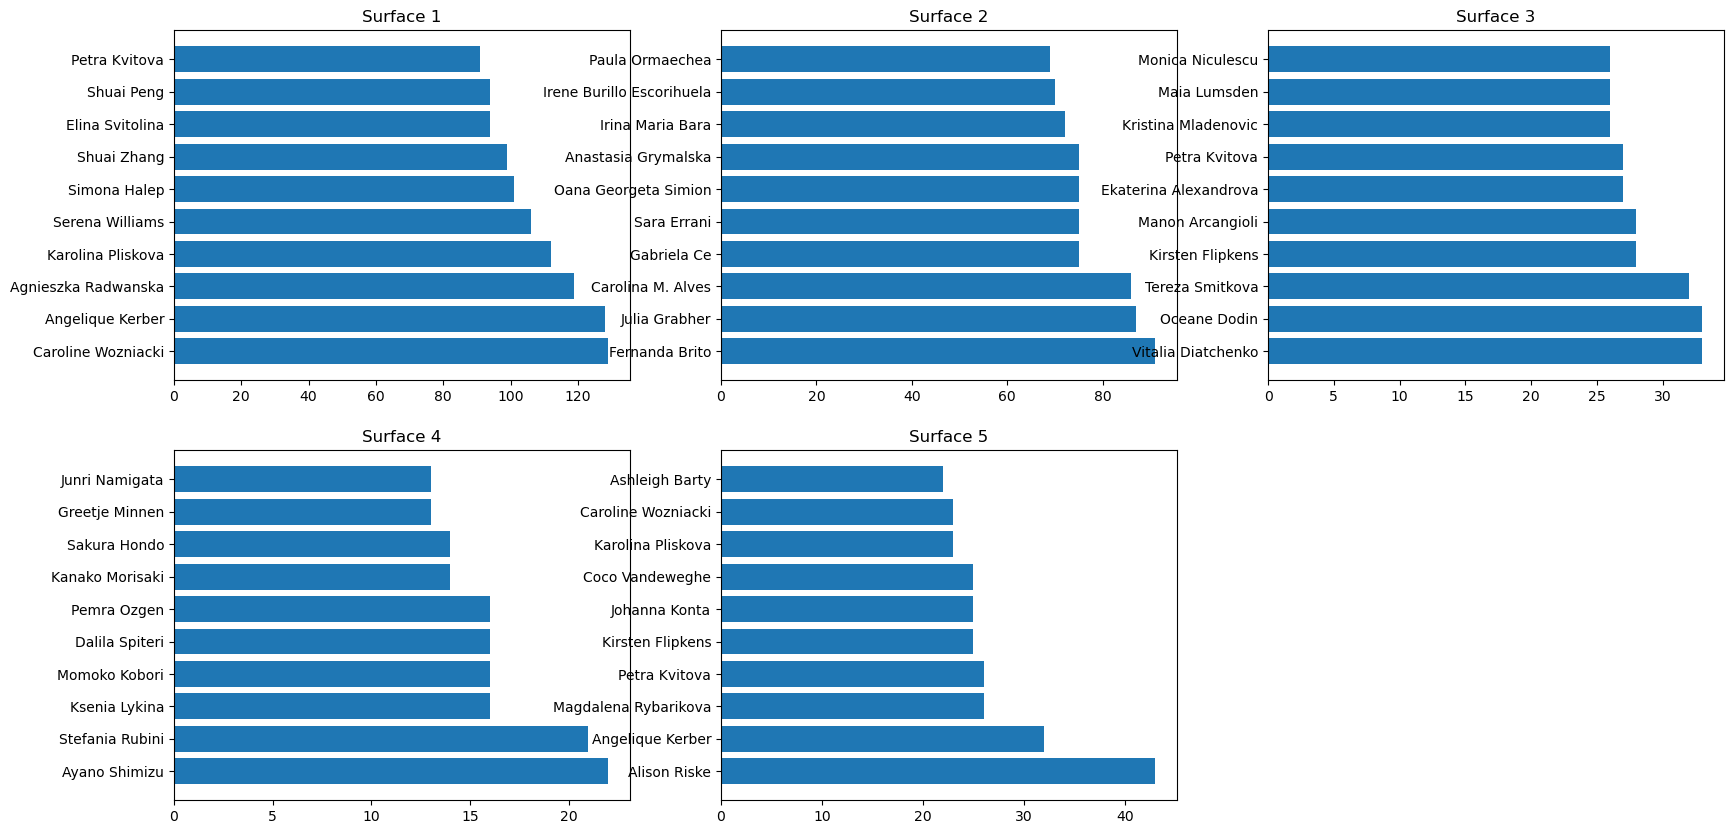

In [224]:
fig , ax = plt.subplots(figsize = (20,10))
plt.subplot(2,3,1)
xpoints = best_players_in_surface1.index[0:10]
ypoints = best_players_in_surface1['total'][0:10]
plt.barh(xpoints, ypoints)
plt.title("Surface 1")

plt.subplot(2,3,2)
xpoints = best_players_in_surface2.index[0:10]
ypoints = best_players_in_surface2['total'][0:10]
plt.barh(xpoints, ypoints)
plt.title("Surface 2")

plt.subplot(2,3,3)
xpoints = best_players_in_surface3.index[0:10]
ypoints = best_players_in_surface3['total'][0:10]
plt.barh(xpoints, ypoints)
plt.title("Surface 3")

plt.subplot(2,3,4)
xpoints = best_players_in_surface4.index[0:10]
ypoints = best_players_in_surface4['total'][0:10]
plt.barh(xpoints, ypoints)
plt.title("Surface 4")

plt.subplot(2,3,5)
xpoints = best_players_in_surface5.index[0:10]
ypoints = best_players_in_surface5['total'][0:10]
plt.barh(xpoints, ypoints)
plt.title("Surface 5");

## Question 2

In [225]:
results = subdf[['SETS_0-2_1', 'SETS_1-2_1','SETS_2-0_1','SETS_2-1_1']].dropna()
ending_results_rate = results.apply(lambda x:sum(x)/results.shape[0] ,axis=0)
ending_results_rate

SETS_0-2_1    0.345690
SETS_1-2_1    0.135169
SETS_2-0_1    0.375569
SETS_2-1_1    0.143571
dtype: float64

- 37.56% matches end by the score of 2-0 for player 1. 

## Question 3

In [226]:
df_new = subdf[['player1_won','Serve1stWon_1','Serve2ndWon_1','Aces_1','DoubleFaults_1']].dropna(axis = 0)
df_new['player1_won']=df_new['player1_won'].astype('int')
df_new['Serve1stWon_1']=df_new['Serve1stWon_1'].astype('int')
df_new['Serve2ndWon_1']=df_new['Serve2ndWon_1'].astype('int')
df_new['Aces_1']=df_new['Aces_1'].astype('int')
df_new['DoubleFaults_1']=df_new['DoubleFaults_1'].astype('int')

df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93357 entries, 0 to 134809
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   player1_won     93357 non-null  int64
 1   Serve1stWon_1   93357 non-null  int64
 2   Serve2ndWon_1   93357 non-null  int64
 3   Aces_1          93357 non-null  int64
 4   DoubleFaults_1  93357 non-null  int64
dtypes: int64(5)
memory usage: 4.3 MB


In [227]:
y = df_new['player1_won']
X = df_new[['Serve1stWon_1','Serve2ndWon_1','Aces_1','DoubleFaults_1']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =66)
lm_model = LinearRegression()
lm_model.fit(X_train, y_train)
y_test_preds = lm_model.predict(X_test)
"The r-squared score for the model is {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model is 0.12025537306267498 on 23340 values.'

In [229]:
lm_model.coef_

array([ 0.00989196,  0.01163585,  0.02333186, -0.03921565])

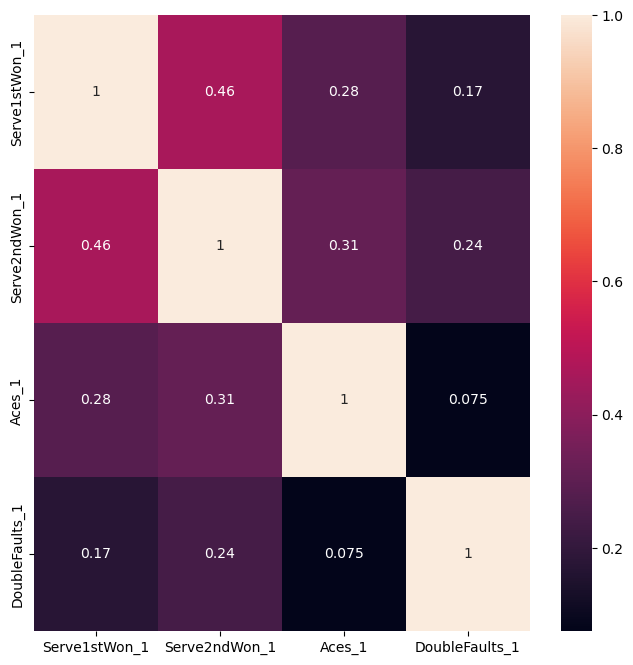

In [238]:
fig , ax = plt.subplots(figsize = (8,8))
sns.heatmap(X.corr(), annot = True);

- Form the coefficients for the liner regression model, we know numbers of 1st serves won, 2nd serves won and Aces are positive factors, the nubmer of Double Faults is negtive factors. 
- And the 1st serves won is more relative to the 2nd servs won. 
- If a tennis player has better performance of 1st serves, then she had lager probability to win.